In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

127
15


In [3]:
# data_file_path

In [5]:
#发作为1；未发作为0
y_train=[]
for i in train_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in test_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

127
67
15
13


In [6]:
#每16s数据截成8段2s，所以y也要变成8*17倍长度
# 截成 4段4s，y变成4*17的长度
# 改成 2段8s，y变成2*17的长度
# 直接16s，y长度为1*17
y_long_data=[]
for i in y_train:
    for j in range(8*17):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

17272


In [7]:
y_long_test_data=[]
for i in y_test:
    for j in range(8*17):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

2040


In [8]:
import scipy.signal
import scipy.io as scio    
channels_selected=17
samps = 2

In [10]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for k in range(channels_selected):
        data_channel = data[k]
        for j in range(0,16,samps):
            data_temp = data_channel[j*256:(j+samps)*256]
            x_train.append(data_temp)

Opening raw data file ./SE_train_processed\Z何富桂20220221_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z何富桂20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z何富桂20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z何富桂20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z倪诗瑄20220311_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z倪诗瑄20220314_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z倪诗瑄20220316_bias_0.fif...
Isotrak not found
    Range : 

<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z何富桂20220221_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z何富桂20220225_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z何富桂20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Ready.
Opening raw data file ./SE_train_processed\Z刘世清20220314（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z刘世清20220314（未发作）_bias_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z刘世清20220314（未发作）_bias_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z刘世清20220314（未发作）_bias_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z刘世清20220314（未发作）_bias_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z刘世清20220314（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z刘世清20220316_bias_0

<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z刘世清20220314（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z刘世清20220314（未发作）_bias_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z刘世清20220314（未发作）_bias_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z徐珍英20220218（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z徐珍英20220218（未发作）_bias_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z徐珍英20220218（未发作）_bias_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z徐珍英20220218（未发作）_bias_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z徐珍英20220218（未发作）_bias_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z徐珍英20220218（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 s

<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z张璐20220302_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z徐珍英20220218（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z徐珍英20220218（未发作）_bias_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fi

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z曾刚20220223_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z李玉萍20220216_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z李玉萍20220218_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z李玉萍20220221（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z李玉萍20220221（未发作）_bias_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z李玉萍20220221（未发作）_bias_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Openi

<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z曾刚20220221_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z曾刚20220223_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z李玉萍20220216_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.g

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z林儒波20220328（未发作）_bias_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z林儒波20220328（未发作）_bias_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z林儒波20220328（未发作）_bias_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z林儒波20220328（未发作）_bias_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z林儒波20220328（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z林儒波20220330_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw 

<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z林儒波20220328（未发作）_bias_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z林儒波20220328（未发作）_bias_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z林儒波20220328（未发作）_bias_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z王纯刚20220328_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z肖星星20220325_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z肖星星20220328_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z肖星星20220330（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z肖星星20220330（未发作）_bias_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z肖星星20220330（未发作）_bias_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Open

<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z王纯刚20220325_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z王纯刚20220328_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z肖星星20220325_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z雷振20220321_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z雷振20220323_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z雷振20220325_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z雷振20220328_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z齐金钢20220223_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_train_processed\Z齐金钢20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./

<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z赵丽兰20220304_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z雷振20220321_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-89d14009422d>:3: RuntimeWarning: This filename (./SE_train_processed\Z雷振20220323_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.g

In [11]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for k in range(channels_selected):
        data_channel = data[k]
        for j in range(0,16,samps):
            data_temp = data_channel[j*256:(j+samps)*256]
            x_test.append(data_temp)

Opening raw data file ./SE_test_processed\Z宋志辉20220318.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_test_processed\Z宋志辉20220321.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_test_processed\Z宋志辉20220323.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_test_processed\Z宋志辉20220325.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_test_processed\Z林攀攀20220223（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_test_processed\Z林攀攀20220225（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ./SE_test_processed\Z林攀攀20220228.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Rea

<ipython-input-11-35c44af40944>:3: RuntimeWarning: This filename (./SE_test_processed\Z宋志辉20220318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-11-35c44af40944>:3: RuntimeWarning: This filename (./SE_test_processed\Z宋志辉20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-11-35c44af40944>:3: RuntimeWarning: This filename (./SE_test_processed\Z宋志辉20220323.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw

In [12]:
len(x_train) #17 * 92 * n段=1564 * n

17272

In [13]:
len(x_test)

2040

In [15]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter
0,1
1,4
2,3
3,2
4,3
...,...
122,2
123,1
124,4
125,2


In [17]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter
0,3
1,2
2,1
3,4
4,1
5,3
6,4
7,1
8,2
9,4


In [18]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
long_ECT_code = [i for i in ECT_code for k in range(8*17)]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(17272, 2)

In [21]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
long_ECT_code_test = [i for i in test_ECT_code for k in range(8*17)]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(2040, 2)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [26]:
# 每次都要记得更改输入的shape
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(512,1))#单通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(input1)
pool1=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv1)#64*256

conv2=tf.keras.layers.Conv1D(32,5,padding='same',activation='relu')(pool1)
pool2=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv2)#32*128

conv3=tf.keras.layers.Conv1D(16,3,padding='same',activation='relu')(pool2)
pool3=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv3)#16*64

flatten1=tf.keras.layers.Flatten()(pool3)

dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
dense2=tf.keras.layers.Dense(64,activation='relu')(dense1)
concatenate1=tf.keras.layers.Concatenate()([dense2,input2])
dense3=tf.keras.layers.Dense(20,activation='sigmoid')(concatenate1)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(dense3)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 1)]     0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 512, 64)      384         ['input_3[0][0]']                
                                                                                                  
 average_pooling1d_3 (AveragePo  (None, 256, 64)     0           ['conv1d_3[0][0]']               
 oling1D)                                                                                         
                                                                                                  
 conv1d_4 (Conv1D)              (None, 256, 32)      10272       ['average_pooling1d_3[0][0]

In [28]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics='accuracy'
             )

F:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)

In [30]:
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = 8,epochs = 40,verbose = 1,
                    validation_split = 0.2  # 训练集的20%用作验证集
                   )

Epoch 1/40
1728/1728 [==============================] - 12s 6ms/step - loss: 0.2335 - accuracy: 0.6116 - val_loss: 0.1831 - val_accuracy: 0.7708
Epoch 2/40
1728/1728 [==============================] - 10s 6ms/step - loss: 0.2153 - accuracy: 0.6618 - val_loss: 0.1818 - val_accuracy: 0.7528
Epoch 3/40
1728/1728 [==============================] - 10s 6ms/step - loss: 0.1990 - accuracy: 0.6910 - val_loss: 0.1868 - val_accuracy: 0.7164
Epoch 4/40
1728/1728 [==============================] - 11s 6ms/step - loss: 0.1790 - accuracy: 0.7275 - val_loss: 0.1855 - val_accuracy: 0.7323
Epoch 5/40
1728/1728 [==============================] - 11s 6ms/step - loss: 0.1588 - accuracy: 0.7636 - val_loss: 0.2035 - val_accuracy: 0.7054
Epoch 6/40
1728/1728 [==============================] - 11s 6ms/step - loss: 0.1426 - accuracy: 0.7892 - val_loss: 0.2069 - val_accuracy: 0.7143
Epoch 7/40
1728/1728 [==============================] - 11s 6ms/step - loss: 0.1252 - accuracy: 0.8194 - val_loss: 0.1944 - val_ac

In [31]:
loss_,acc_ = model.evaluate([x_train,long_ECT_code],y_train)

540/540 [==============================] - 3s 5ms/step - loss: 0.0691 - accuracy: 0.9159


In [35]:
x_test=np.array(x_test)
y_test=np.array(y_test)#方便实用validation_split
long_ECT_code_test = np.array(long_ECT_code_test)
loss_,acc_ = model.evaluate([x_test,long_ECT_code_test],y_test)

64/64 [==============================] - 0s 5ms/step - loss: 0.2157 - accuracy: 0.7525


In [36]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(acc) + 1)

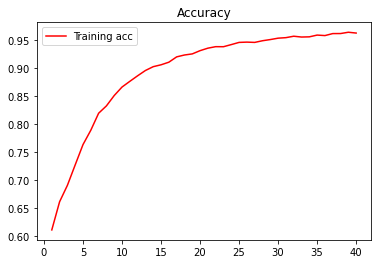

In [37]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

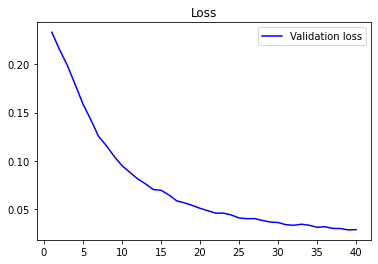

In [38]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [39]:
model.save('../model_save/'+model.name + "_ECT+16s_40_" + str(acc_)[:8] + "_.h5")